<a href="https://colab.research.google.com/github/dikshasen24/Heart-Disease-Prediction/blob/master/Code_for_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE DATASET**

14 attributes (13 x + 1 target) - 297 patients 

***condition: 0 = no heart disease, 1 = heart disease present***

# **Variables description:**

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
Value 0: typical angina

*   Value 0: typical angina
*   Value 1: atypical angina

*   Value 2: non-anginal pain
*   Value 3: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)


*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment


*   Value 0: upsloping
*   Value 1: flat


*   Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

condition: 0 = no disease, 1 = disease


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'pandas' for dataframes (excel for python), 'numpy' for stat analysis, matplotlib' for making plots and 'seaborn' for statistical data visualization


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import dataset**

In [ ]:
# IMPORT DATASET

# We are reading our data
heart = pd.read_csv("heart_uci.csv")

In [ ]:
# see if loaded correctly
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
# Index of the data

heart.keys()

# index acts as a key that tells us about data

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

# **EDA**

In [ ]:
# Missing values

heart.isnull()

# false = data is not missing, true = data is missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False


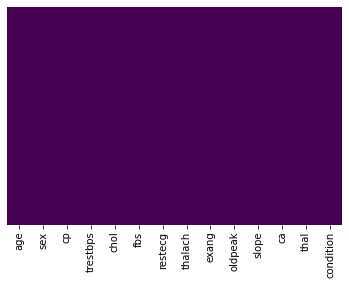

In [ ]:
# Visulaize how much data is missing 

sns.heatmap(heart.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# if any data had been missing, it would have been highlighted in yellow
# no yellow lines = no missing values = very clean data

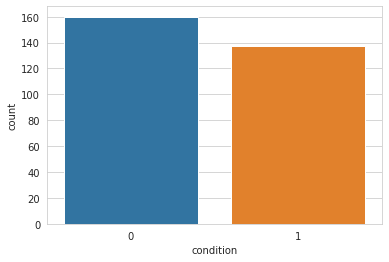

In [ ]:
# Visualize data in general

sns.set_style('whitegrid')
sns.countplot(x='condition', data = heart)

# 0 = no heart disease, 1 = heart disease

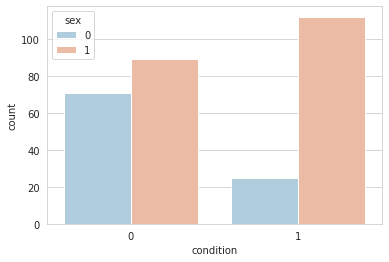

In [ ]:
# Visualize relationship between variables

sns.set_style('whitegrid')
sns.countplot(x='condition', hue = 'sex', data = heart, palette = 'RdBu_r')

# More males suffer from heart disease than females 

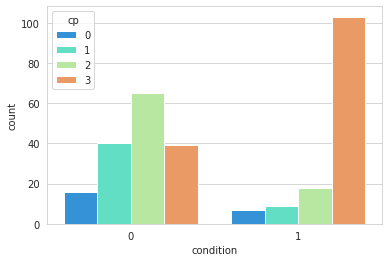

In [ ]:
# Visualize relationship between variables

sns.set_style('whitegrid')
sns.countplot(x='condition', hue = 'cp', data = heart, palette = 'rainbow')

# those who have heart disease suffer mostly from asymptomatic chest pain 
# those who do not have disease suffer from a wide range of chest pains  

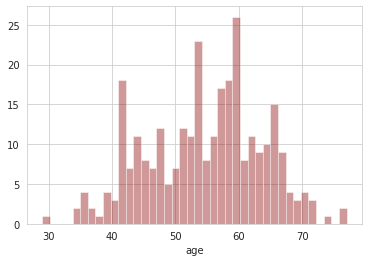

In [ ]:
# Visualize relationship between variables

sns.distplot(heart['age'].dropna(),kde=False,color='darkred',bins=40)

# overall age distribution of patients in this study

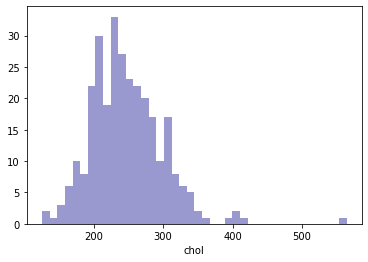

In [ ]:
# Visualize relationship between variables

sns.distplot(heart['chol'].dropna(),kde=False,color='darkblue',bins=40)

# overall cholestrol distribution of patients in this study

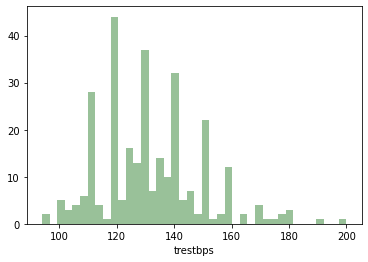

In [ ]:
# Visualize relationship between variables

sns.distplot(heart['trestbps'].dropna(),kde=False,color='darkgreen',bins=40)

# overall resting BP distribution of patients in this study

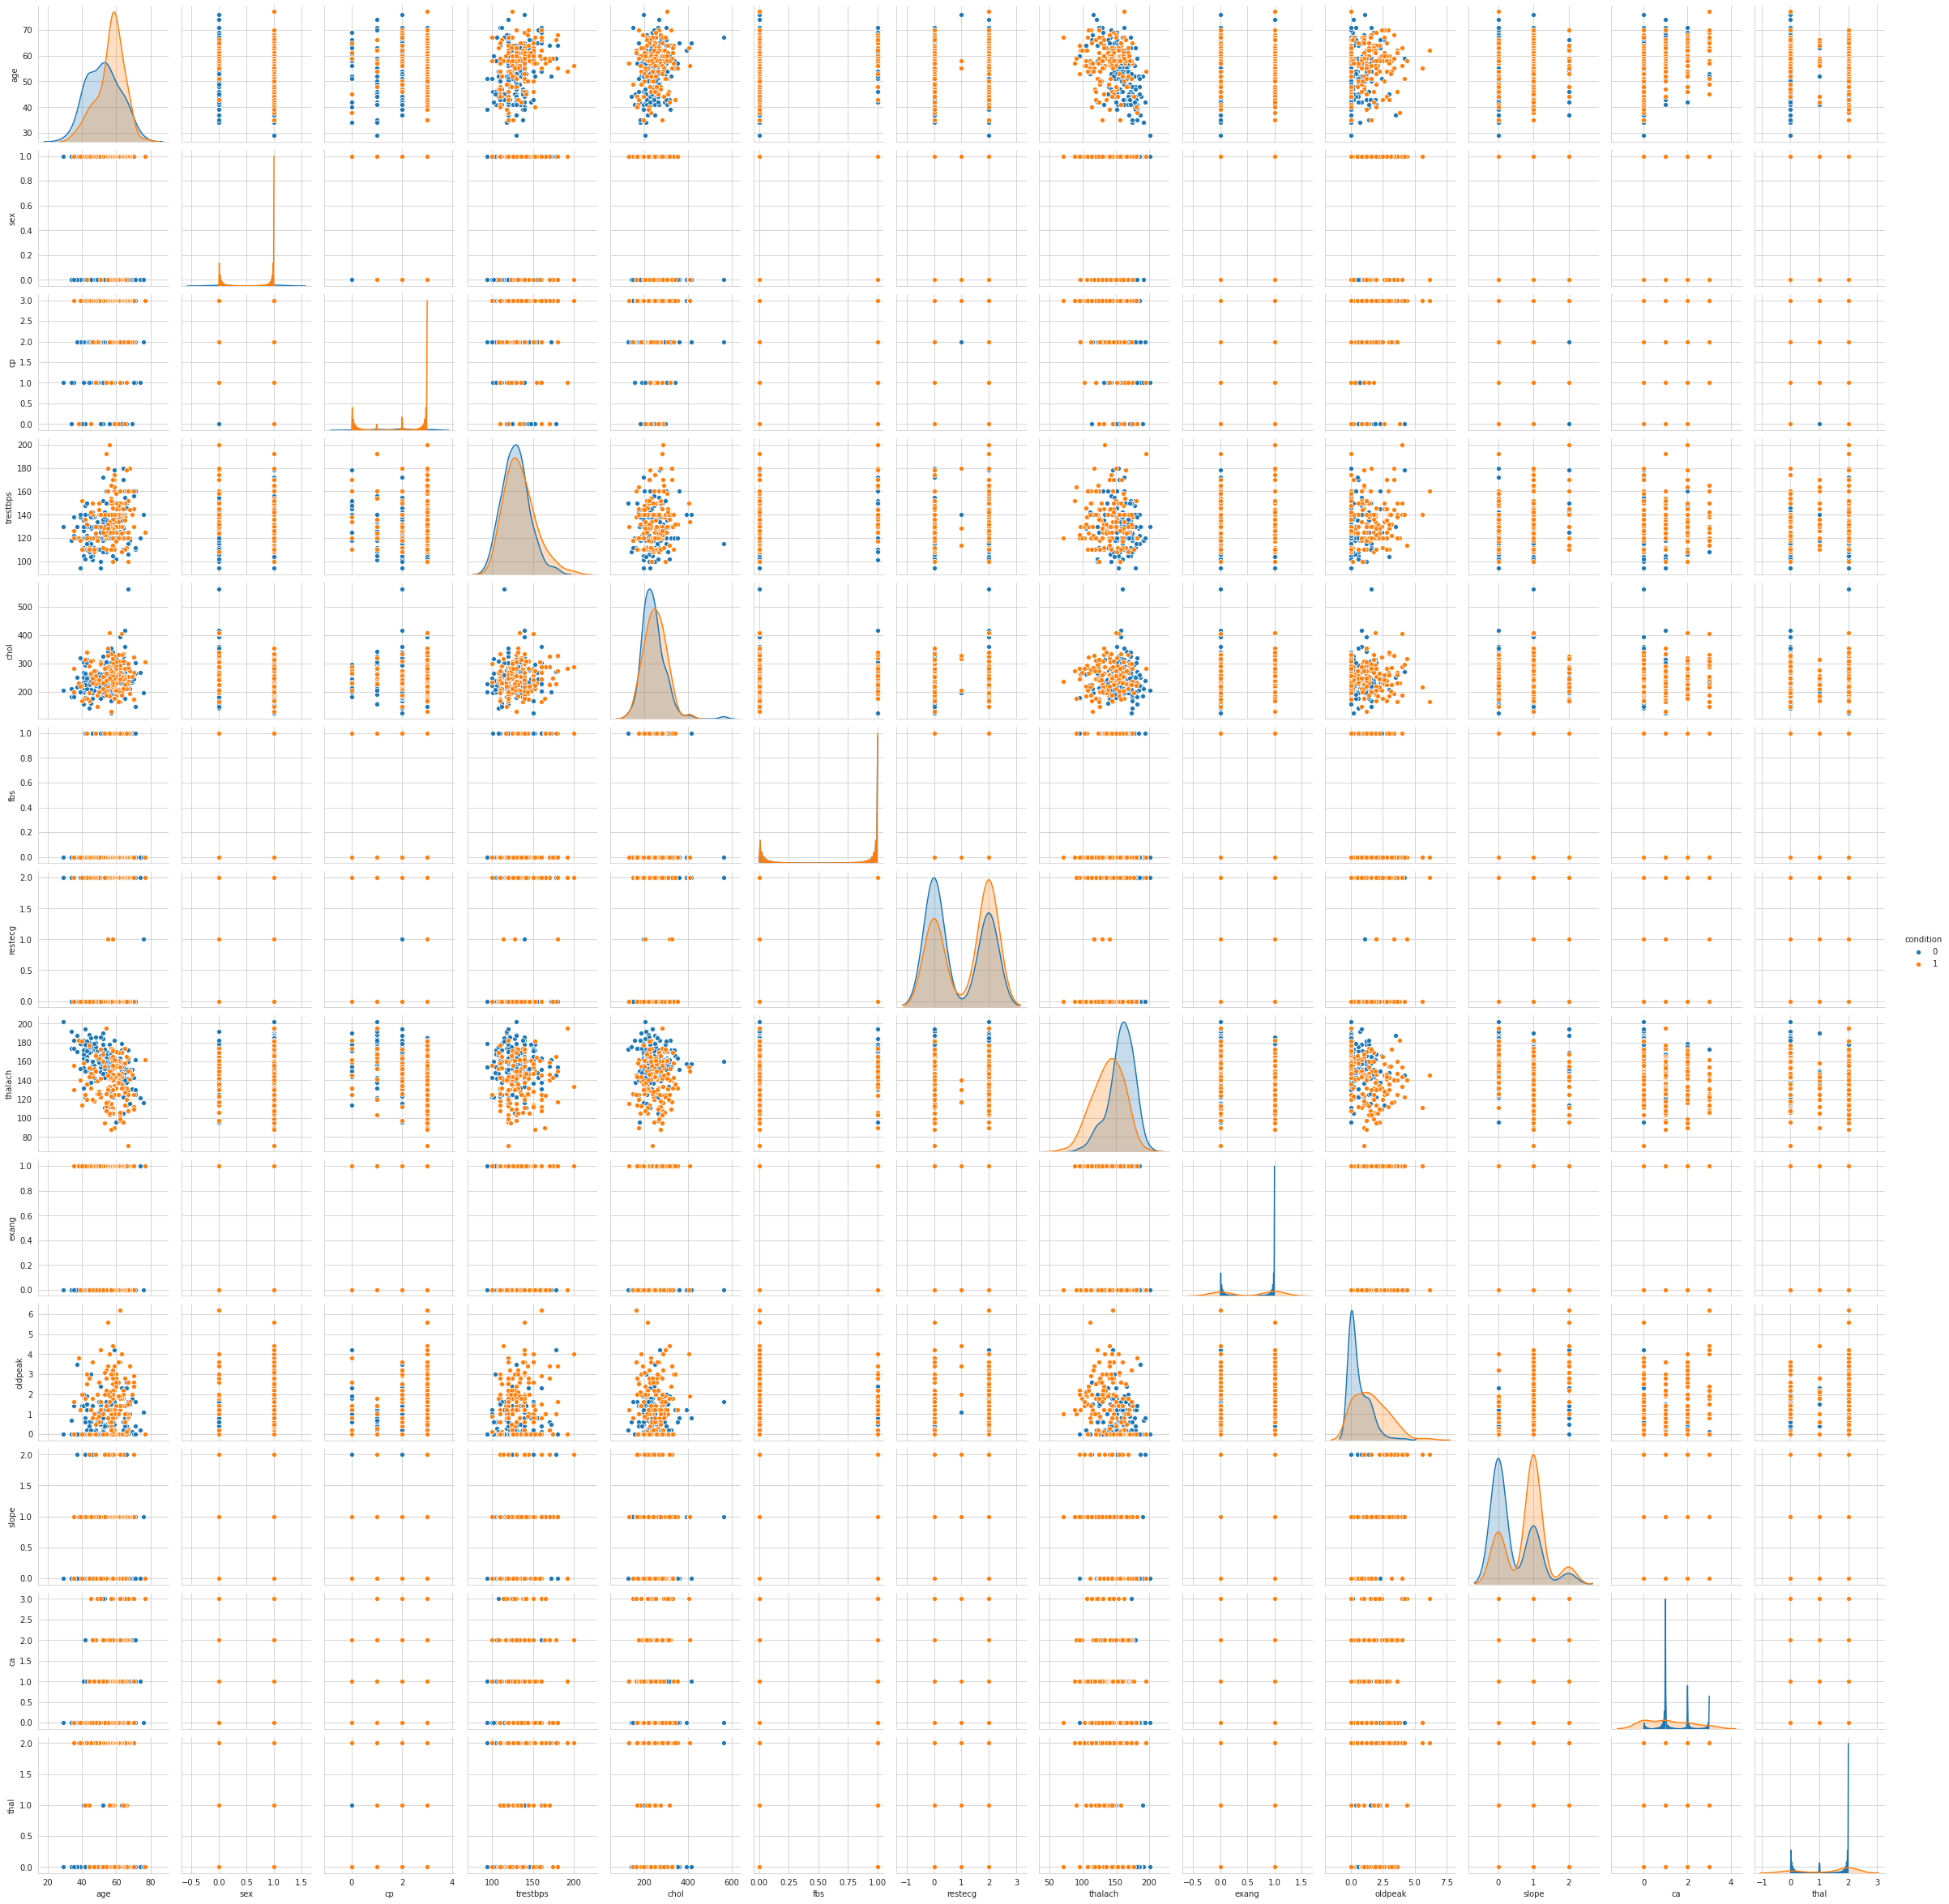

In [ ]:
# plot scatterplot of vars against each other 

sns.pairplot(heart, hue= 'condition', vars= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

# 0 = no heart disease (blue), 1 = heart disease present (orange)

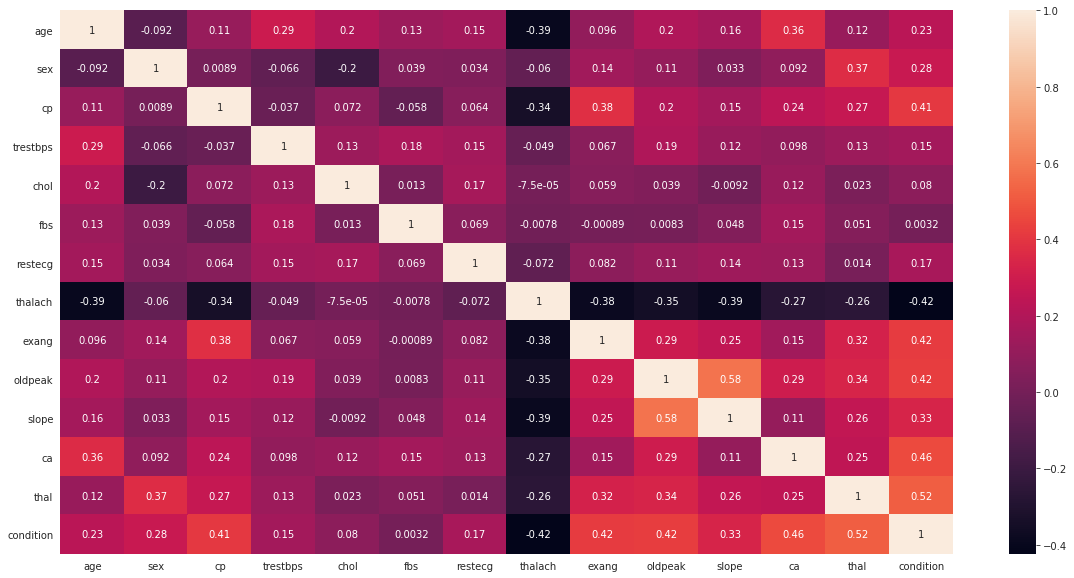

In [ ]:
# above plot very difficult to see, get corr values instead
# make correlation plots
# we want values, so annot = True

plt.figure(figsize=(20,10))
sns.heatmap (heart.corr(), annot= True)

# **MODEL TRAINING**

In [ ]:
# dropping condition var to obtain input 'X'
# axis is 1 since we are dropping entire column 'condition'

X= heart.drop(['condition'], axis= 1)

In [ ]:
X

# do not have target anymore, so only inputs now

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [ ]:
# making target the y var (output)

y= heart['condition']

In [ ]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [ ]:
# splitting into train and test-70/30

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=10)

In [ ]:
X_train.shape

(207, 13)

In [ ]:
X_test.shape

(90, 13)

In [ ]:
y_train.shape

(207,)

In [ ]:
y_test.shape

(90,)

# **LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# fit train data to log reg model

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# now apply predict function to predict for X_test

predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test, predictions)

In [ ]:
accuracy

array([[44,  5],
       [ 7, 34]])

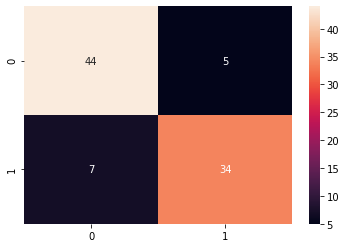

In [ ]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(accuracy, annot= True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)

In [ ]:
accuracy

# model accuracy is 86.7% on test 

0.8666666666666667

In [ ]:
# see how well model has predicted for train (just to check)

trainpred = logmodel.predict(X_train)
acc = accuracy_score(y_train, trainpred)
acc

0.855072463768116

In [ ]:
# take a look at the coefficients and the intercept

print(logmodel.coef_, logmodel.intercept_)

[[-3.12105090e-02  8.34675908e-01  5.54084507e-01  2.69382187e-02
   8.39576831e-04 -4.18323394e-01  2.63118173e-01 -3.71210333e-02
   5.37881555e-01  3.76027884e-01 -2.79906149e-01  1.02965881e+00
   6.07548850e-01]] [-0.06650643]


Feature: 0, Score: -0.03121
Feature: 1, Score: 0.83468
Feature: 2, Score: 0.55408
Feature: 3, Score: 0.02694
Feature: 4, Score: 0.00084
Feature: 5, Score: -0.41832
Feature: 6, Score: 0.26312
Feature: 7, Score: -0.03712
Feature: 8, Score: 0.53788
Feature: 9, Score: 0.37603
Feature: 10, Score: -0.27991
Feature: 11, Score: 1.02966
Feature: 12, Score: 0.60755


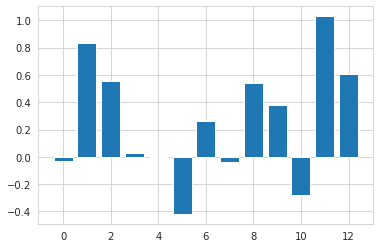

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get importance
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import random
random.seed(1234)

In [ ]:
random_forest = RandomForestClassifier(n_estimators= 100)

# number of estimators indicates how complex the tree is: 100 = number od decision trees

In [ ]:
random_forest.fit(X_train, y_train.values.ravel())

# 'fit' applies to train data, 'predict' applies to test data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_test, y_test)

# on applying our model to test data, we get an accuracy of 83.33%

0.8333333333333334

In [ ]:
# saving rf results to csv 

res = pd.DataFrame(y_pred)
res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("rfprediction_results.csv")

In [ ]:
# also getting actual values for reference 

act = pd.DataFrame(y_test)
act.to_csv("actualrf.csv")

In [ ]:
# feature importance 

feature_importances = pd.DataFrame(random_forest.feature_importances_, index = X_train.columns,
                                   columns = ['importance']).sort_values('importance',ascending = False)

feature_importances

,importance
thalach,0.153212
cp,0.136854
ca,0.131345
thal,0.101546
oldpeak,0.089998
age,0.088757
trestbps,0.084508
chol,0.075421
exang,0.050180
slope,0.031151


In [ ]:
# plot feature importance for easier visulaization

def plot_feature_importance(importance,names,model_type):
  feature_importance=np.array(importance)
  feature_names = np.array(names)
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

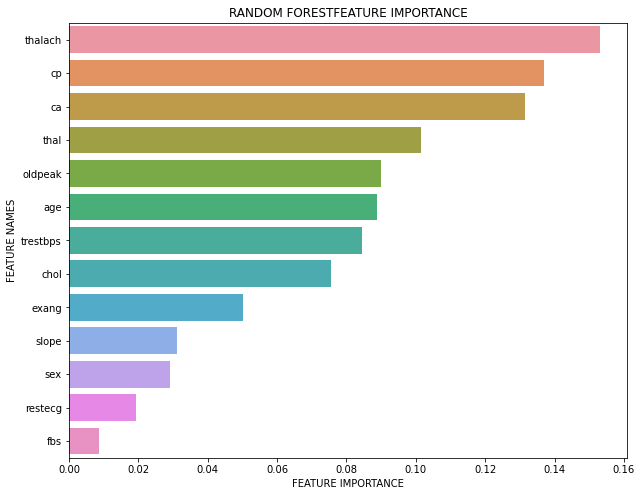

In [ ]:
plot_feature_importance(random_forest.feature_importances_,X_train.columns,'RANDOM FOREST')

In [ ]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

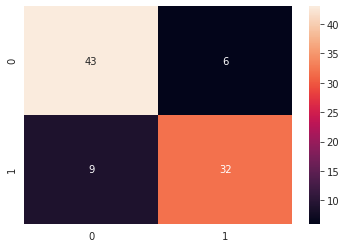

In [ ]:
sns.heatmap(cnf_matrix, annot= True)

# # Type 2 error - 6, Type 1 error - 9

In [ ]:
res = pd.DataFrame(predictions)
res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("log5prediction_results.csv")

# **DECISION TREES MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
decision_tree.score(X_test,y_test)

# so model is 71.11% accurate on test data

0.7111111111111111

In [ ]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred.round()) 

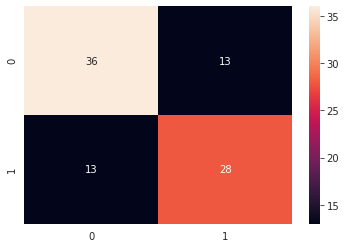

In [ ]:
sns.heatmap(cnf_matrix, annot= True)

# Type 1 error = 13, Type 2 error = 13

# **SVM MODEL**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model= SVC()

In [ ]:
# this code trains the model using X_train and y_train data

svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# let's predict outcome using test data

y_predict= svc_model.predict(X_test)

In [ ]:
svc_model.score(X_test, y_test)

# accuracy = 64.44%

0.6444444444444445

In [ ]:
# generating confusion matrix

cm= confusion_matrix(y_test, y_predict)

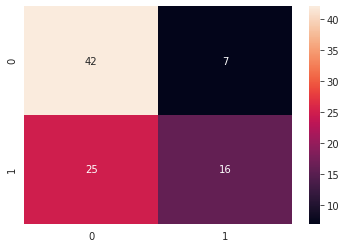

In [ ]:
sns.heatmap(cm, annot= True)

# Type 1- 25, Type 2- 7

# **DEEP LEARNING MODEL**

In [ ]:
# converting to array format so analysis can be done

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# BUILD MODEL

from keras import Sequential  
from keras.layers import Dense           
from keras.layers import Dropout         

In [ ]:
model = Sequential([
                    Dense(units = 16, input_dim = 13, activation = 'relu'),
                    Dense(units = 24, activation = 'relu'),
                    Dropout(0.5),
                    Dense(20,activation = 'relu'),
                    Dense(24,activation = 'relu'),
                    Dense(1,activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
______________________________________________________

In [ ]:
# TRAIN MODEL

model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'] )
model.fit(X_train, y_train, batch_size= 10, epochs = 100)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 7.5538 - accuracy: 0.5121
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 4.1843 - accuracy: 0.4541
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 3.6444 - accuracy: 0.4879
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 3.3239 - accuracy: 0.5024
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 2.3532 - accuracy: 0.4928
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 1.6622 - accuracy: 0.5362
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 1.5944 - accuracy: 0.5459
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 1.2697 - accuracy: 0.5990
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 1.2922 - accuracy: 0.5652
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 1.1446 - accuracy: 0.5990
Epoch 11/

In [ ]:
# model accuracy = 75.56% 

# evaluate model by generating a score that checks our model on the test data

score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7556


In [ ]:
print(score)

# Score tells us that our model was 75.56% accurate with respect to test 

[0.5271650552749634, 0.7555555701255798]


In [ ]:
# Generate confusion metrics

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())       

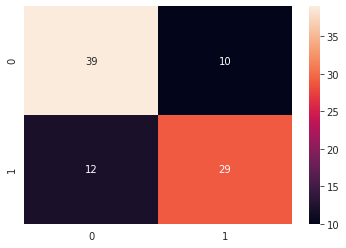

In [ ]:
sns.heatmap(cnf_matrix, annot= True)

# Type 2 - 10, Type 1 - 12

# **SUMMARY: OVERALL MODEL ACCURACY ON TEST DATA**



1.   Logistic Regression - 86.7%
2.   Random Forest - 83.33%
3.   Decision Trees - 71.11%
4.   SVM - 64.44%
5.   Deep Learning (Sequential model) - 75.56% 



# **SUMMARY: ACCURACY WITH WHICH MODEL IS ABLE TO CORRECTLY PREDICT HEART DISEASE (PREDICTED CLASS = 1)**

1. Logistic Regression - 82.93%
2. Random Forest - 78.05%
3. Decision Trees - 68.29%
4. SVM - 39.02%
5. Deep Learning (Sequential model)- 70.73%